In [15]:
%pip install tensorflow
%pip install pandas
%pip install numpy

# Voorbeeldexamen
## Vraag 1 .../46
In deze vraag proberen we de kwaliteit van een wijnsoort te voorspellen op twee verschil-lende manieren, nl. met een classificatie- en met een regressiemodel. Beantwoord hiertoede onderstaande vragen.
Vergeet niet je antwoorden op dit blad in te vullen!

(a)(2pt) Gebruik een Keras functie om de dataset te downloaden van de volgende URL: https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Zorg dat de dataset onmiddellijk wordt uitgepakt

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as ks

In [17]:
URL = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
file = ks.utils.get_file(origin=URL,
                     extract=True,
                      cache_dir=".")

(2pt) Pas volgende code aan om de dataset voor de witte wijnen in te lezen in een Pandas dataframe en vervolgens onmiddellijk op te zetten naar een Numpy array.
```python
file_path = None
wine_df = pd.read_csv(file_path, delimiter=";")
wine_raw_data = wine_df.values
```
Verifieer dat je dataset 4898 rijen en 12 kolommen heeft. Zorg dat deze code in jeoplossing staat

In [18]:
file_path = "./datasets/wine+quality.zip/winequality-white.csv"
wine_df = pd.read_csv(file_path, delimiter=";")
wine_raw_data = wine_df.values
print(wine_raw_data.shape)
wine_df.shape

(4898, 12)


(4898, 12)

(2pt) (c) Gebruik de eerste 4000 voorbeelden als training data, de overige voorbeelden wor-den validatie data. We gebruiken geen test data. Gebruik `wine_raw_data_train` en `wine_raw_data_val`  als namen voor de Numpy arrays

In [19]:
wine_raw_data_train = wine_raw_data[:4000]
wine_raw_data_val = wine_raw_data[4000:]

(2pt) (d) Maak vier Numpy arrays. Twee voor de features, en twee voor de *“quality“* (laat-ste kolom). De laatste kolom is het label dat moet voorspeld worden. Noem deze `X_train`, `X_val`, `y_train`, en `y_val`

In [20]:
X_train = wine_raw_data_train[:,:-1] # alles behalve laatste kol
y_train = wine_raw_data_train[:,-1]

X_val = wine_raw_data_val[:,:-1]
y_val = wine_raw_data_val[:,-1]

(2pt) (e) Definieer en initialiseer een Keras laag die er voor zorgt dat de features worden genor-maliseerd zodat ze gemiddelde nul en standaardafwijking 1 hebben. Zorg dat er geen“data leakage” ontstaat. Noem je laagpreprocess_laye

In [21]:
preprocessing_layer = ks.layers.Normalization()
# X_train voor leakage te voorkomen
preprocessing_layer.adapt(X_train)

ks.ops.mean(preprocessing_layer(X_val), axis=0)[0]
ks.ops.std(preprocessing_layer(X_val), axis=0)[0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.7956857681274414>

(6pt) (g) De wijnkwaliteit bestaat uit 11 verschillende soorten van wijn, in oplopende kwaliteitvan 0 t.e.m. 10. We willen de kwaliteit van de wijn voorspellen op basis van de features. We willen dit op verschillende manieren kunnen doen:
- Met of zonder gebruik van de preprocessing laag die we reeds hebben gedefinieerd.
- Als een *classificatie-* of *regressieprobleem*.

De modellen die we willen maken bestaan uit
- Een (optionele) preprocessing laag.
- Een volledige geconnecteerde laag met 20 neuronen en de rectified linear unit alsactivatiefunctie.
- Een volledig geconnecteerde uitvoerlaag met het gepaste aantal neuronen en degepaste activatiefunctie voor een classificatie- of regressieprobleem. 

Maak een functie `get_model` met de volgende parameters:
- units: aantal neuronen in de uitvoerlaag.
- preprocess_layer: een optionele preprocessing laag. Indien deze parameter gelijk is aan `None` dan gebeurt er geen preprocessing.
- activation: een string of `None` die de activatiefunctie beschrijft die op de uitvoerlaag moet worden gebruikt

In [22]:
def get_model(units, preprocess_layer=None, activation=None):
  model = ks.Sequential()

  model.add(ks.layers.Input(shape=(11,),name="input"))

  if preprocessing_layer:
    model.add(preprocessing_layer)

  model.add(ks.layers.Dense(units=20, activation="relu"))

  model.add(ks.layers.Dense(units=units, activation=activation))
  return model

(4pt) (h) Roep de methode uit de vorige stap aan met de gepaste parameters om het probleem op te lossen als een classificatieprobleem met gebruik van de preprocessing laag die je al voordien hebt gedefinieerd. 
Dus `model = get_model(...)` 

Hoeveel trainbare en niet-trainbare parameters heeft dit model?

```python
 Trainable params: 450 (1.76 KB)
 Non-trainable params: 23 (96.00 B)
 ```

In [23]:
class_model = get_model(units=10,preprocess_layer=preprocessing_layer,activation="softmax")
class_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 473 (1.85 KB)

 Trainable params: 450 (1.76 KB)

 Non-trainable params: 23 (96.00 B)

(4pt) (i) Compileer het model met de volgende opties.
- Gebruik de `RMSprop` optimizer met een learning rate van *0.0005*.
- Rapporteer een metriek waarmee we kunnen volgen welk percentage van de voorbeelden juist wordt geclassificeerd.
- Gebruik voor het overige de gepaste parameters voor dit classificatieprobleem.

In [24]:
class_model.compile(
    optimizer=ks.optimizers.RMSprop(learning_rate=0.005),
    metrics=["accuracy"],
    loss="sparse_categorical_crossentropy",
)

(7pt) (j) Train het model met de volgende opties.
- Gebruik batches van grootte128.
- Zorg dat het beste model wordt opgeslagen als “model.tf”. Het beste modelwordt gedefinieerd als het model dat het grootste percentage van de voorbeeldenin de validatiedataset juist classificeert.
- Train voor maximaal 100 epochs, maar zorg dat er wordt gestopt als het modelbegint te overfitten.
  - Kijk hiervoor naar het percentage juist geclassificeerde voorbeelden.–Beschouw enkel een verbetering van0.1procent als significant.
  - Geef het trainingsproces 3 epochs de kans om zich te herstellen.
  - De beste gewichten moetennietteruggezet worden

In [25]:

early_stop = ks.callbacks.EarlyStopping(min_delta=0.001,
                                           patience=3,
                                           restore_best_weights=True
                                           )
save_callback = ks.callbacks.ModelCheckpoint("model.keras")
class_model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=128,
    epochs=100,
    callbacks=[early_stop,save_callback]
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3603 - loss: 1.8795 - val_accuracy: 0.4800 - val_loss: 1.3068
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4818 - loss: 1.2830 - val_accuracy: 0.5568 - val_loss: 1.1309
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5139 - loss: 1.1861 - val_accuracy: 0.5423 - val_loss: 1.0953
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5424 - loss: 1.1116 - val_accuracy: 0.5145 - val_loss: 1.1079
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5461 - loss: 1.1064 - val_accuracy: 0.5546 - val_loss: 1.0674
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5435 - loss: 1.0846 - val_accuracy: 0.5523 - val_loss: 1.0378
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5556 - loss: 1.0844 - val_accuracy: 0.5323 - val_loss: 1.0715
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5369 - loss: 1.0887 - val_accuracy: 0.5501 - 

(3pt) (k) Laad het beste model terug in en evalueer het op de validatiedata. Welke accuraatheid bekom je?

In [26]:
loss, accuracy = class_model.evaluate(X_val, y_val, verbose=0)
print(f"De accuraatheid op de validatiedata is: {accuracy:.4f}")

De accuraatheid op de validatiedata is: 0.5935


(2pt) (i) Het probleem is eigenlijk “ordinaal” van aard, dus misschien kan een regressieaanpakook goed werken? Creëer een model met preprocessing laag, maar voor een regressie-probleem:
```python
model2 = get_model(...)
```

In [27]:
relu_model = get_model(units=1,activation="relu")

(3pt) (m) Compileer en train dit tweede model als volgt:
- Gebruik de Adam optimizer met alle default waarden.
- Gebruik de gepaste loss-functie voor een regressieprobleem.
- Er hoeven geen extra metrieken te worden gerapporteerd.
- Gebruik een batch grootte van 128.
- Train voor 100 epochs. We doen niets om eventuele overfitting tegen te gaan,maar we volgen wel de loss op de validatiedata

In [28]:
relu_model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)

relu_model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=128,
    epochs=100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 33.8115 - val_loss: 32.6014
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.9061 - val_loss: 28.7130
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.8057 - val_loss: 24.1077
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.7185 - val_loss: 19.7559
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6982 - val_loss: 15.6833
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.0480 - val_loss: 12.0846
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.5216 - val_loss: 9.3757
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1649 - val_loss: 7.3524
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9894 - val_loss: 5.8523
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3664 - val_loss: 4.8231
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4547 - val_loss: 4.1555
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

(3pt) (n) Schrijf een methode om de accuraatheid van je regressiemodel na te gaan. Deze me-thode heeft de volgende signatuur en kan als volgt worden aangeroepen:
```python
def accuracy(labels, raw_predictions):
    pass

print(accuracy(y_val, model2.predict(X_val)))
```
De predicties van het model worden omgezet naar klasselabels door ze af te rondennaar het dichtstbijzijnde gehele getal. De accuraatheid (van het regressiemodel) is hetpercentage correct voorspelde voorbeelden na de voorgaande afronding

In [29]:
def accuracy(labels, raw_pred):
  prediction = ks.ops.reshape(ks.ops.round(raw_pred), newshape=(len(labels),))
  absolute_err = ks.ops.abs(prediction - labels)

  return ks.ops.sum(ks.ops.equal(absolute_err,0)) / len(labels)


In [30]:
acc = accuracy(y_val,relu_model.predict(X_val))
acc

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


<tf.Tensor: shape=(), dtype=float64, numpy=0.5367483296213809>

## Vraag 2 .../23

“Xception” is één van de gekende convolutionele architecturen binnen beeldverwerking. In deze opgave implementeer je een deel van deze architectuur als een Keras Layer. In **Figuur 1** zie je een schematisch overzicht van dit netwerk zoals weergegeven in het origineleartikel dat deze architectuur beschrijft.


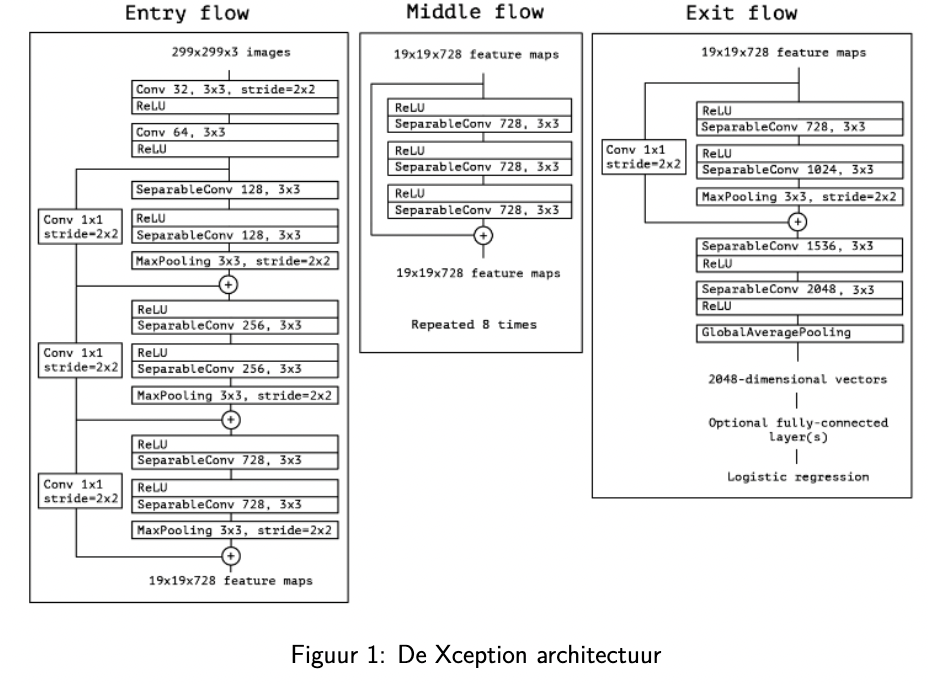

Deze architectuur maakt gebruik van een speciaal soort convolutie, nl. een “depth-wiseseparable convolution”. De precieze details zijn niet van belang, wél dat deze laag beschikbaar is in Keras als `SeparableConv2D`.

De Xception architectuur bestaat voor het grootste deel uit een opeenvolging van een heelaantal “blokken” waarbij elk blok wordt omringd door een residuele connectie. We implementeren enkel de twee bloktypes in Figuur 2 als één enkeleLayer. Het linkerblok gebruikteen *“MaxPooling”* laag, het rechterblok niet.

(4pt) (a) Zoals je ziet in Figuur 2 gebruikt elkeSeparableConv2Dlaag in de architectuur een kernel grootte van 3 bij 3. Het aantal gebruikte kanalen varieert doorheen de architectuur. Gebruik een Python-techniek om een nieuwe klasse/functie **DefaultSeparableConv**
te maken die voorzien is van zoveel mogelijk default-waarden voor de verschillende parameters.

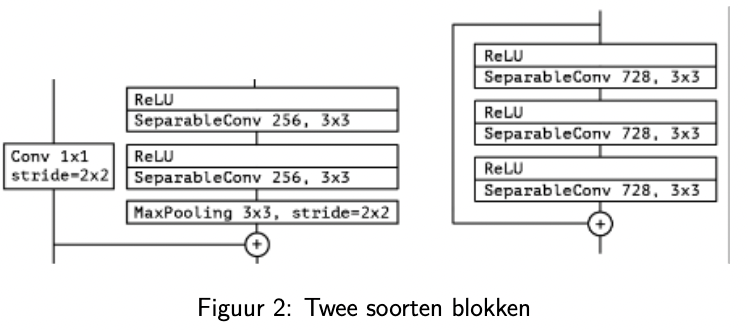


Behalve de kernelgrootte is er nog een parameter die steeds dezelfde waarde aanneemt. 

**Opmerking**: de `SeparableConv2D` lagen gebruiken geen activatiefunctie. De activatiefuncties worden als afzonderlijke lagen toegevoegd.

In [31]:
import functools

In [32]:
DefaultSeperableConv = functools.partial(ks.layers.SeparableConv2D,
                                         kernel_size=(3,3),
                                         padding="same")
DefaultSeperableConv(64)

<SeparableConv2D name=separable_conv2d, built=False>

(15pt) (g) Implementeer `XceptionModule` die afgeleid is van de `Keras Layer` klasse. Deze klasse implementeert een blok zoals voorgesteld in **Figuur 2**. De parameter `use_max_pool` bepaalt of het een blok is zoals aan de linkerkant (wanneer deze parameter `True` is), of een blok zoals aan de rechterkant van **Figuur 2** (wanneer deze parameterFalseis).

- Implementeer de `__init__(self, filters, use_max_pool=False, **kwargs)` methode. Gebruik twee lijsten: één lijst `main_path` houdt alle lagen bij doorheenhet “hoofdpad”, de andere lijst `skip_path` houdt de lagen bij langs het “zijpad”.<br/>
    Merk op: er zijn mogelijks geen lagen langs dit “zijpad”.
  
- Implementeer de `call(self, inputs)` methode

In [43]:
class XceptionModule(ks.layers.Layer):
  def __init__(self, filters, use_max_pool=False, **kwargs):
    super().__init__(**kwargs)
    self.filters = filters
    self.use_max_pool = use_max_pool

    self.main_path = [
        ks.layers.ReLU(),
        DefaultSeperableConv(filters=self.filters), # Dit hebben we gemaakt hierboven
        ks.layers.ReLU(),
        DefaultSeperableConv(filters=self.filters)
    ]
    self.skip_path = [

    ]
    # Main paths
    # Blok 1 heeft een max pool
    if self.use_max_pool:
      self.main_path.append(ks.layers.MaxPool2D(
          padding="same",
          pool_size=(2,2),
          strides=(2,2))) # of (2,2)
    else:
      self.main_path.extend([ks.layers.ReLU(),
                             DefaultSeperableConv(self.filters)])

    # Skip paths
    if self.use_max_pool:
      self.skip_path.append(
          ks.layers.Conv2D(self.filters,
                              kernel_size=(1,1),
                              padding="same",
                              strides=(2,2))
      )

  def call(self, inputs):
    skip_inputs = inputs
    for layer in self.main_path:
      inputs = layer(inputs)

    for layer in self.skip_path:
      skip_inputs = layer(skip_inputs)
    # (b,w,h,c)
    return inputs + skip_inputs


(4pt) (c) Creëer twee zo’n modules:
```python
xception = XceptionModule(filters=64)
xception2 = XceptionModule(filters=64, use_max_pool=True)
```

In [44]:
xception_1 = XceptionModule(filters=64)
xception_2 = XceptionModule(filters=64, use_max_pool=True)

In [45]:
X = ks.random.randint(shape=(2,100,100,64), minval=0, maxval=10,)
X = ks.ops.cast(X, dtype=tf.float32)

Beantwoord de volgende vragen:Als je `xception` uitvoert op een tensor van de vorm *(2, 100, 100, 64)* dan is de vormvan de uitvoer: Als je `xception2` uitvoert op een tensor van de vorm *(2, 100, 100, 32)* dan is de vormvan de uitvoer:

In [49]:
print(f"xception_1 output shape: {xception_1(X).shape}")
print(f"xception_2 output shape: {xception_2(X).shape}")

xception_1 output shape: (2, 100, 100, 64)
xception_2 output shape: (2, 50, 50, 64)
